## 燃烧化学反应速率因素相关计算
本算例参考《燃烧学基础》， "Data_8_2_1.txt" 对应例4-4中表格数据，其题目如下：
![图1](./img/8-2-1.png)  
***
"Data_8_2_2.txt" 对应习题4中表格数据，其题目如下：
![图2](./img/8-2-2.png)

***

其算例的解题思路如下图：
  
 Arrhenius从热力学函数推导出平衡常数K与温度T的关系，提出经验公式:
![图3](./img/8-2-3.png)
上式被称为Arrhenius公式，其中A为频率因子。E为活化能，单位J/mol。
![图4](./img/8-2-4.png)

+------------------+----------+-----------+----------------+----------------------+
|       题目       |  斜率s   | 截距ln(A) | 活化能E(J/mol) | 频率因子A(m^3/mol*s) |
+------------------+----------+-----------+----------------+----------------------+
| .\Data_8_2_1.txt | -2764.30 |    9.29   |    22982.40    |       10875.37       |
| .\Data_8_2_2.txt | -1072.06 |    5.74   |    8913.15     |        310.20        |
+------------------+----------+-----------+----------------+----------------------+


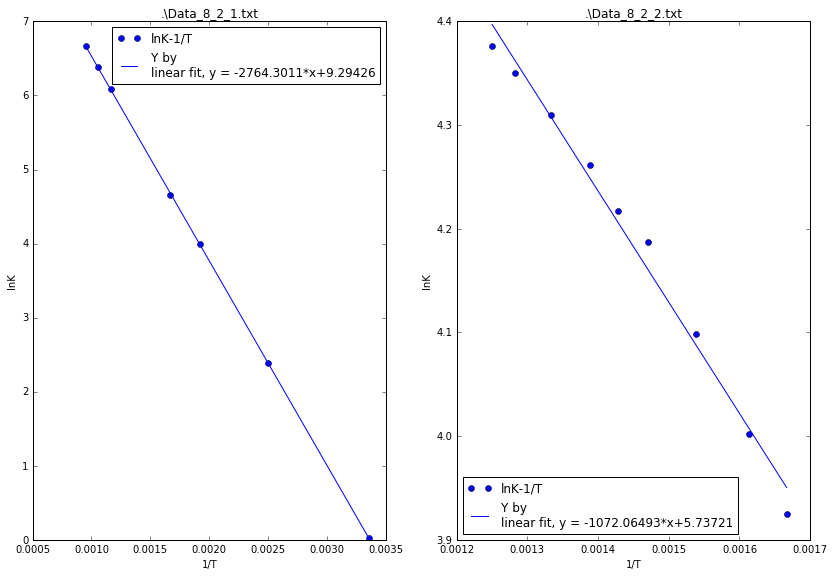

In [1]:
%matplotlib inline
# -*- coding: UTF-8 -*-
'''
@author: XMJ
'''
import matplotlib.pyplot as plt
import numpy as np
import math
from prettytable import PrettyTable
import glob

filenames=[]
lfit=[]
rT=[]
lnK=[]

def getData(fileName):

    dataFile = open(fileName, 'r')
    TK={'T':[],'K':[]}
    discardHeader = dataFile.readline()

    for line in dataFile:
        T,K= line.split()
        TK['T'].append(float(T))
        TK['K'].append(float(K))

    dataFile.close()

    return TK
        
def fitData(T,K):
    #find linear fit
    rT0=[]
    lnK0=[]
    for i in range (len(T)):
        rT0.append(1/T[i])
        lnK0.append(math.log(K[i],math.e))
    a,b = np.polyfit(rT0,lnK0,1)
    predicted_lnK = a*np.array(rT0) + b
    return rT0,lnK0,a,b,predicted_lnK


def plotData(rT,lnK,a,b, predicted_lnK,fileName,i):
    plt.plot(rT,lnK, 'bo',
               label= 'lnK-1/T')

    plt.title(fileName)
    plt.xlabel('1/T')
    plt.ylabel('lnK')

    plt.plot(rT,predicted_lnK,
               label = 'Y by\nlinear fit, y = '
               + str(round(a, 5))+'*x+'+str(round(b, 5)))

    plt.legend(loc = 'best')

def processing_one_TextFile(filename):

    TK=getData(filename)
    
    rT0,lnK0,a,b,predicted_lnK=fitData(TK['T'],TK['K'])

    return rT0,lnK0,a,b,predicted_lnK


def processing_data_TextFiles(filenames):

    for i in range(len(filenames)):

        rT0,lnK0,a,b,predicted_lnK =processing_one_TextFile(filenames[i])
        
        rT.append(rT0)
        lnK.append(lnK0)

        lfit.append({'a':a,'b':b,'pre_lnK':predicted_lnK})
    
def processing_plot_TextFiles(filenames):
    
    fig=plt.figure(figsize=(12.0,8.0))

    fig.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95)

    figcount=len(filenames)

    figcol=2
    figrow=math.ceil(figcount/figcol)

    for i in range(figcount):
        fig.add_subplot(figrow, figcol,i+1)
        plotData(rT[i],lnK[i],
                 lfit[i]['a'],lfit[i]['b'],lfit[i]['pre_lnK'],filenames[i],i)

    plt.show()

def processing_table_TextFiles(filenames):
    table = PrettyTable(["题目","斜率s","截距ln(A)","活化能E(J/mol)","频率因子A(m^3/mol*s)"])

    table.align= "c" # right align
    table.padding_width = 1 # One space between column edges and contents (default)
    
    a=[]
    b=[]
    
    for i in range(len(filenames)):
        a.append(-float(lfit[i]['a'])*8.314)
        b.append((math.e)**float(lfit[i]['b']))
        table.add_row([filenames[i],
                       "%.2f" % lfit[i]['a'],"%.2f" % lfit[i]['b'],
                       "%.2f" % a[i],"%.2f" % b[i]])
    print(table)

if __name__ == '__main__':

    filenames=glob.glob(r'.\Data_8_2_*.txt')
    processing_data_TextFiles(filenames)       
    processing_table_TextFiles(filenames)
    processing_plot_TextFiles(filenames)

***
例题4-4所给出的参考解答如下图：
![图5](./img/8-2-5.png)
  
习题4由我所计算的结果如下图：
![图6](./img/8-2-6.png)
***
可见本程序对此算例的输出结果正确，甚至还发现例题4-4所给出的结果频率因子A有误。